<a href="https://colab.research.google.com/github/dhruvajareddyanumandla/customer-churn-analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
telco_base_data = pd.read_csv('/content/telcomdataset.csv')

In [ ]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_base_data.shape

(7043, 21)

In [ ]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
telco_base_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

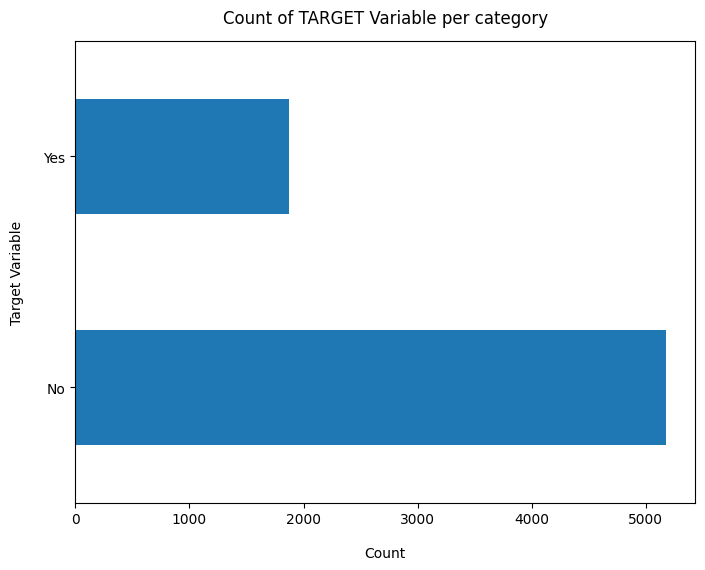

In [ ]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


In [ ]:
telco_base_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Data is highly imbalanced, ratio = 73:27

So we analyse the data with other features while taking the target values separately to get some insights.

In [ ]:
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


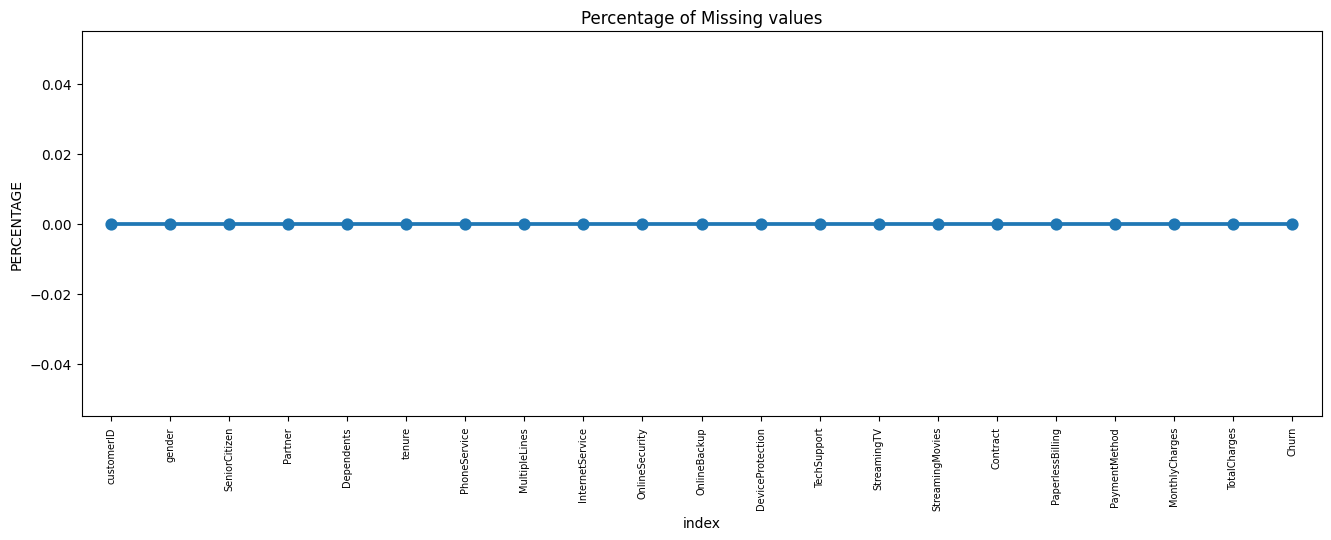

In [ ]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# DATA CLEANING

In [ ]:
telco_data = telco_base_data.copy()

In [ ]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24...

In [ ]:
# Get the max tenure
print(telco_data['tenure'].max())

72


In [ ]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [ ]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# DATA EXPLORATION

Ploting distibution of individual predictors by churn

# Univariate Analysis

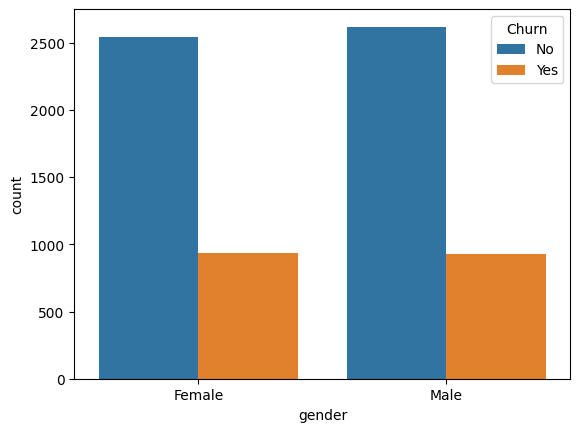

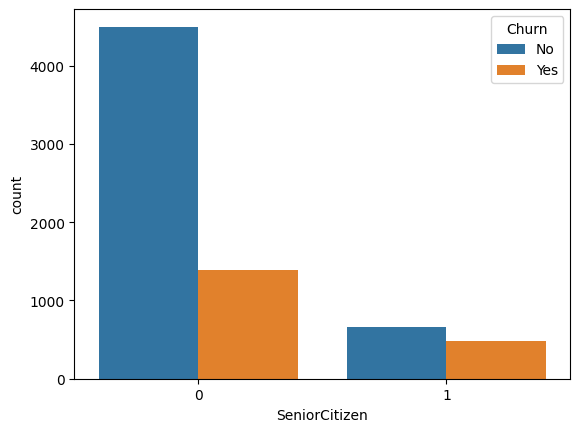

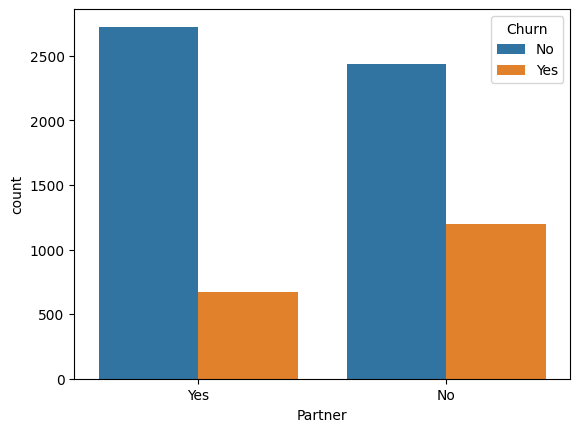

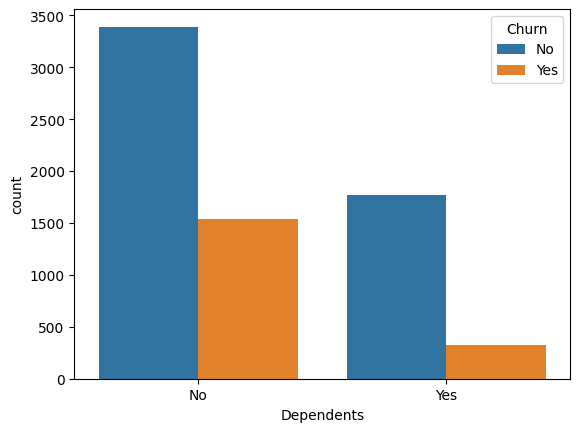

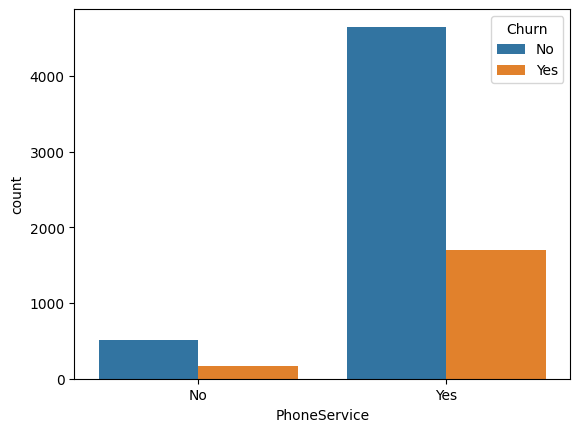

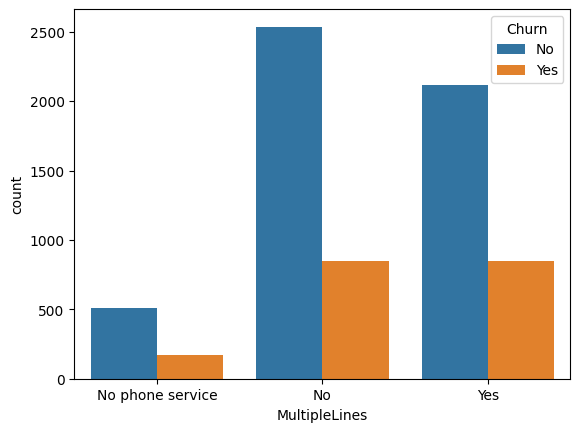

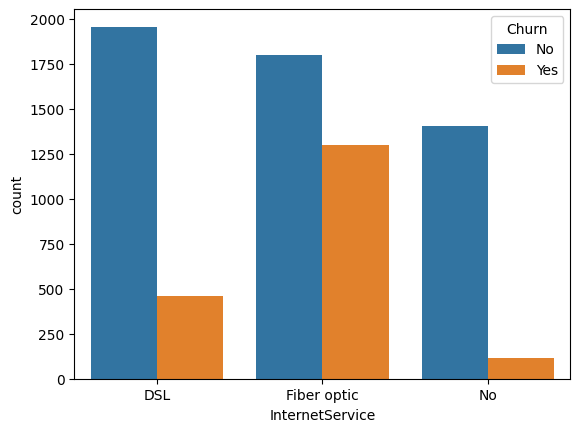

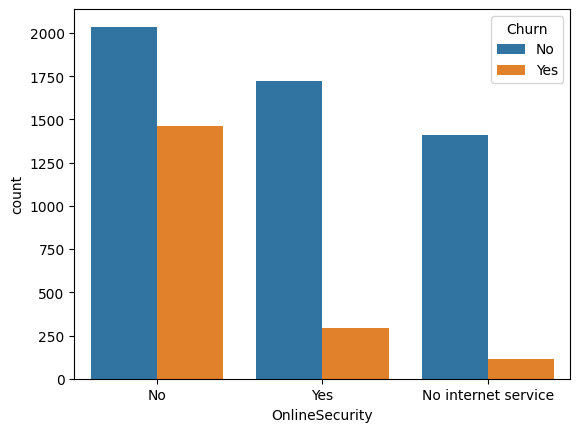

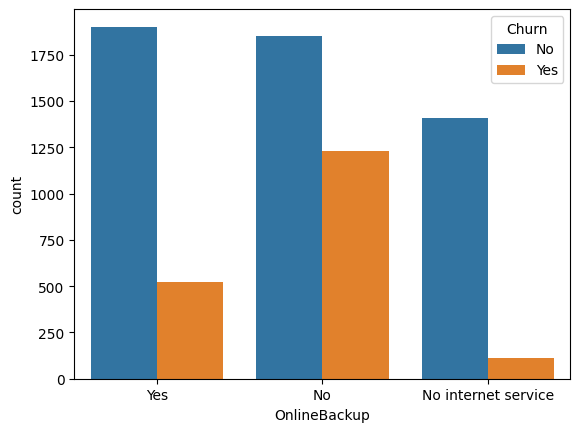

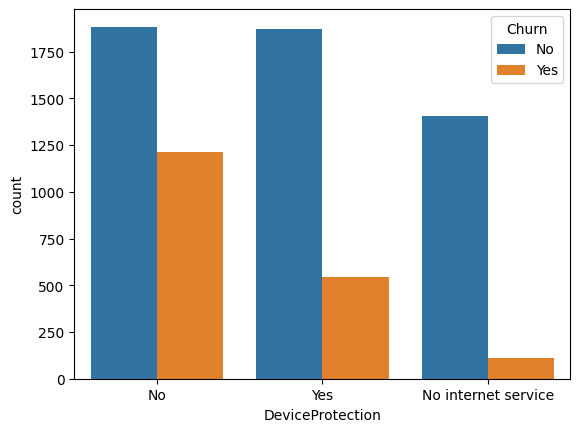

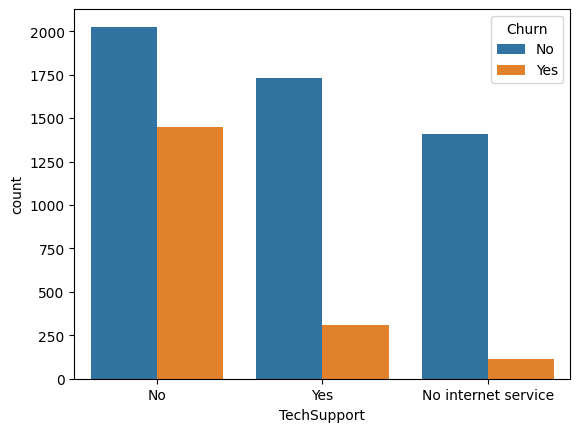

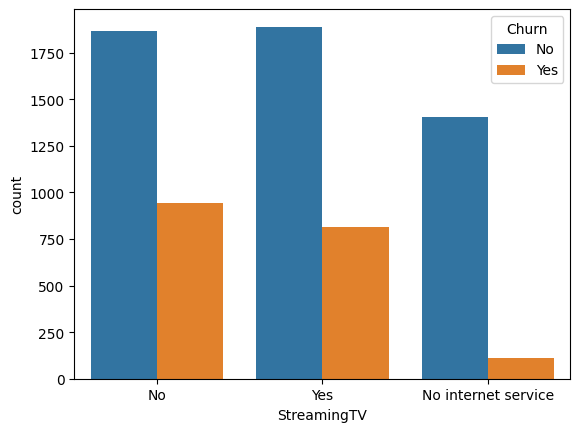

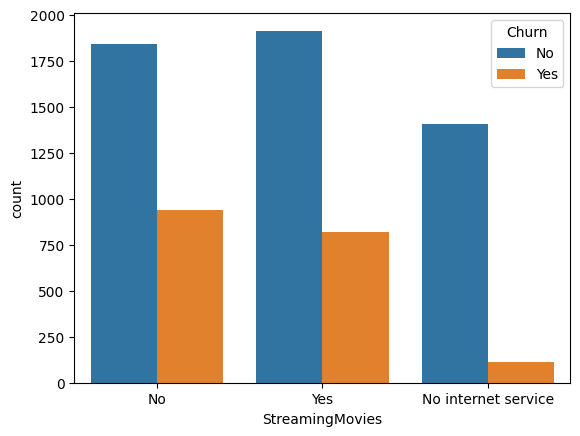

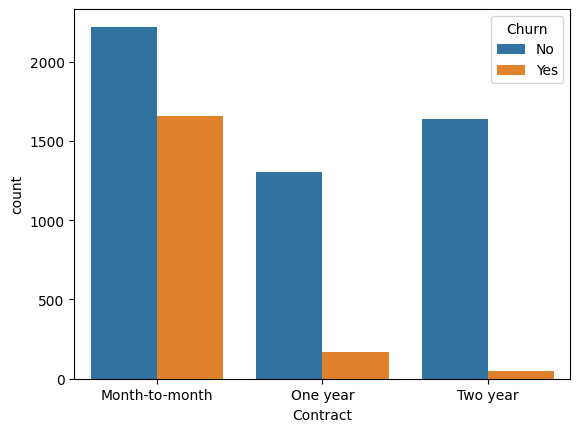

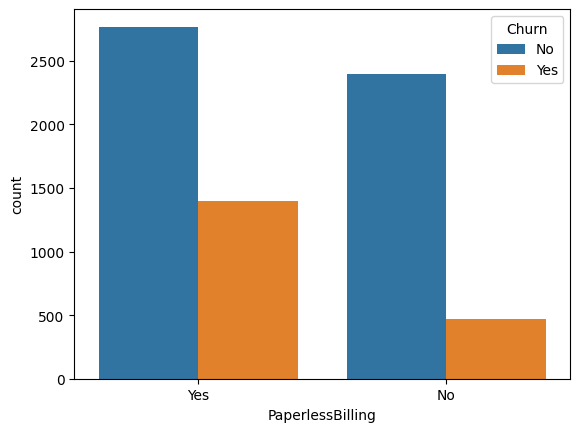

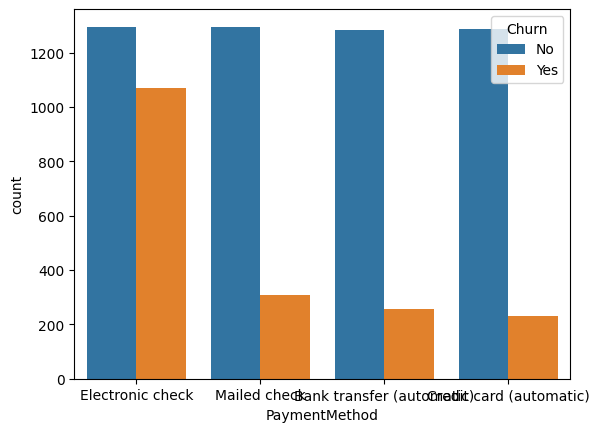

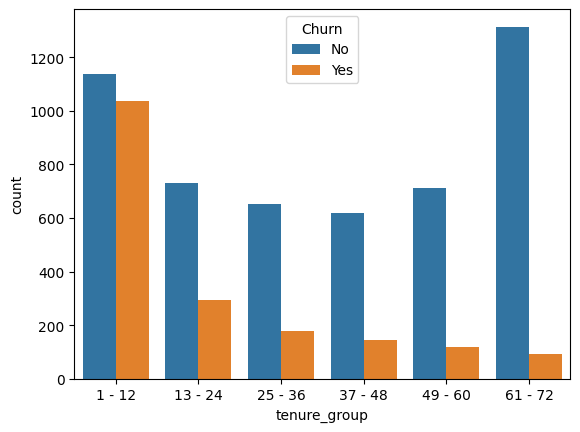

In [ ]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [ ]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [ ]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


Relationship between Monthly Charges and Total Charges

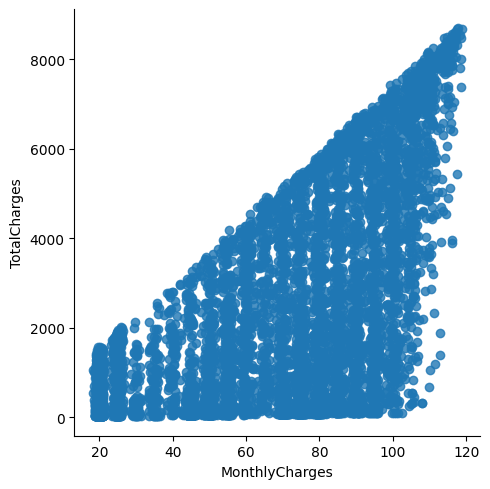

In [ ]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

/tmp/ipython-input-722082952.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
/tmp/ipython-input-722082952.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

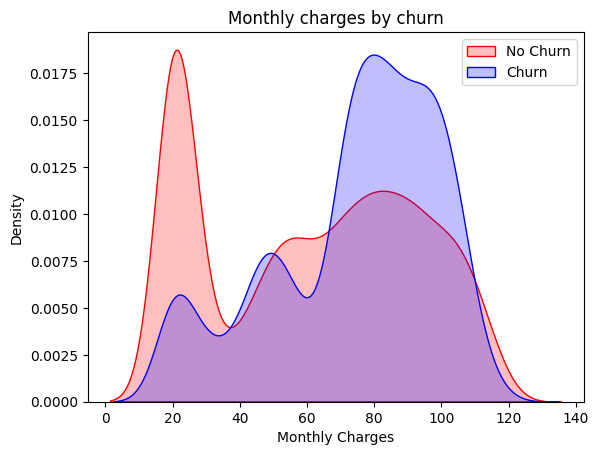

In [ ]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high

/tmp/ipython-input-4019118049.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
/tmp/ipython-input-4019118049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

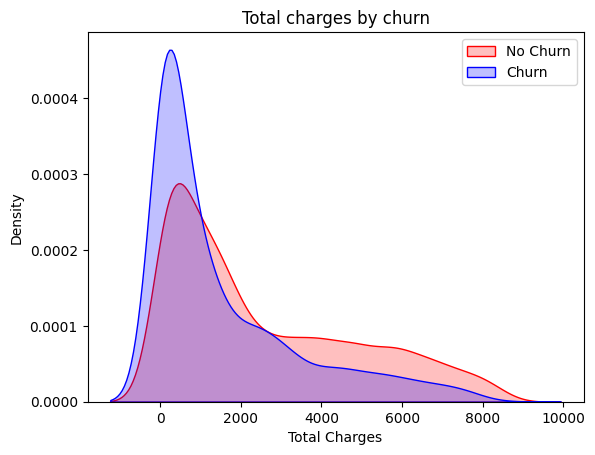

In [ ]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

If we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

<Axes: >

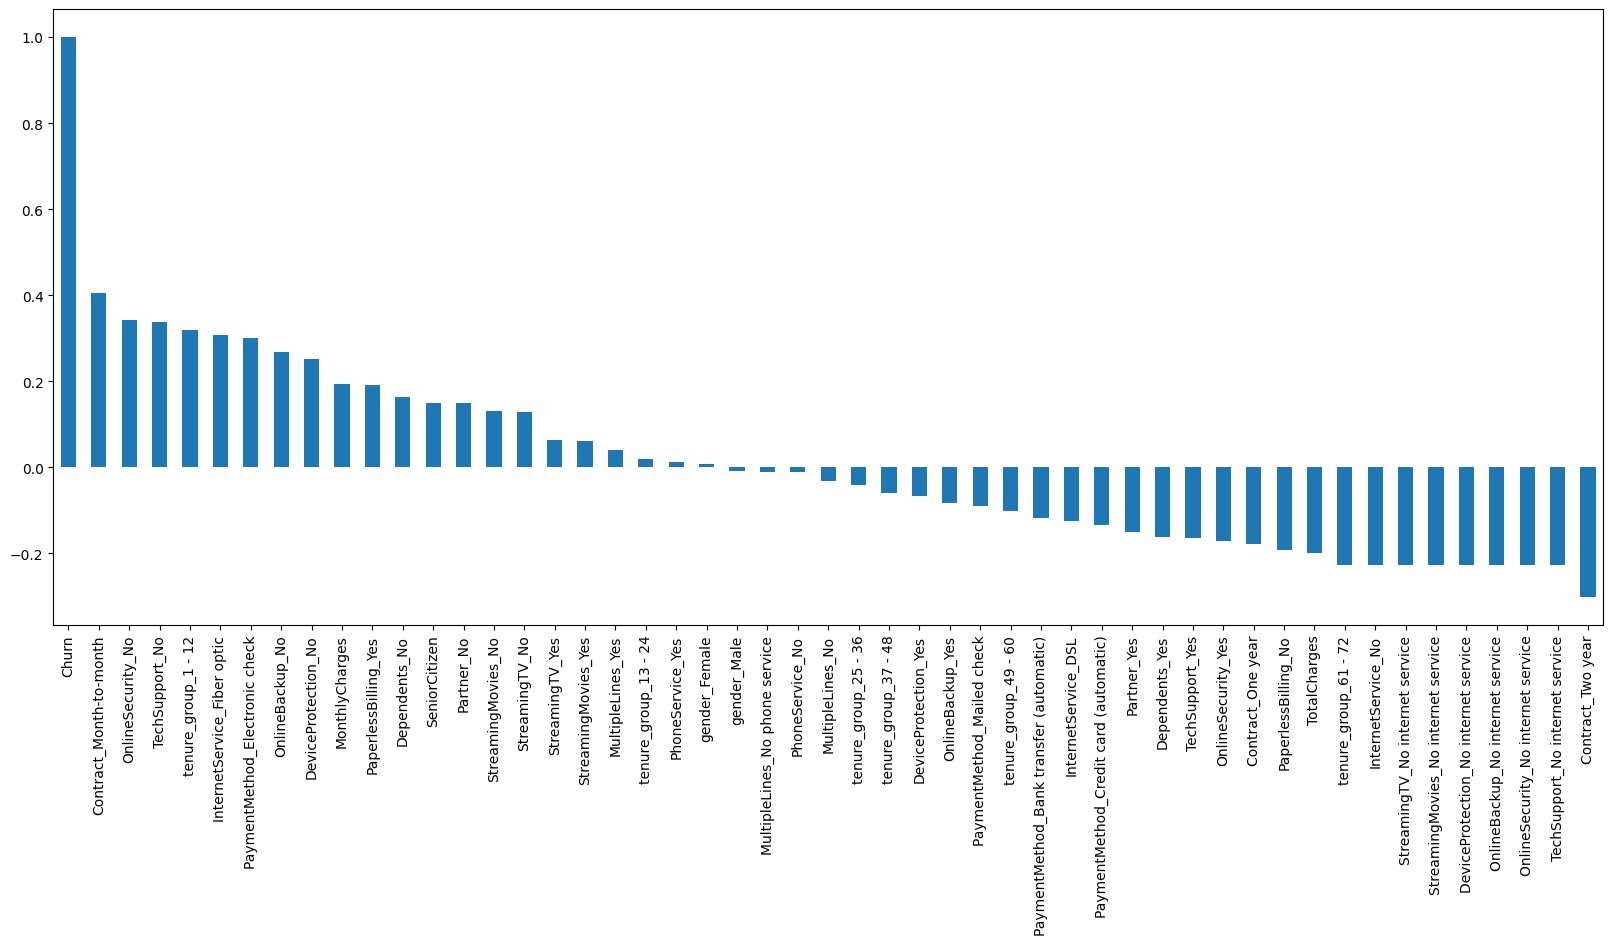

In [ ]:
# corelation of all predictors with 'Churn'
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService have alomost NO impact on Churn

<Axes: >

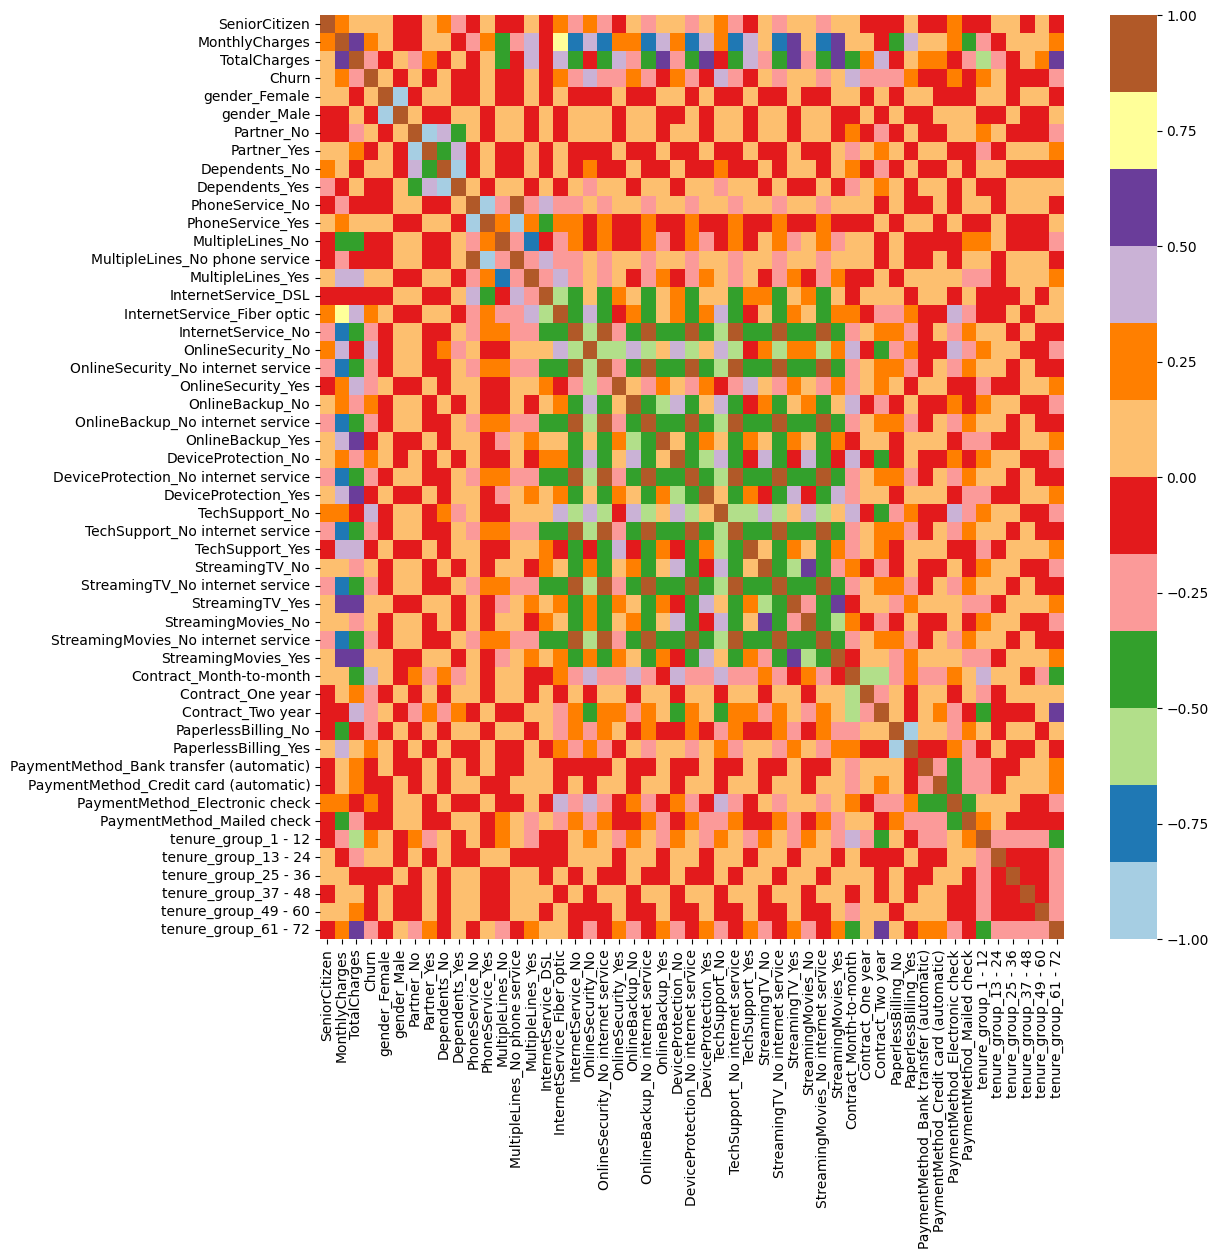

In [ ]:
#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

#Bivariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd

In [ ]:
# Setting a consistent style for visualizations
sns.set(style="whitegrid", palette="muted")

In [ ]:
#Define Categorical Features
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

Chi-Square Test Results (Categorical vs Churn):



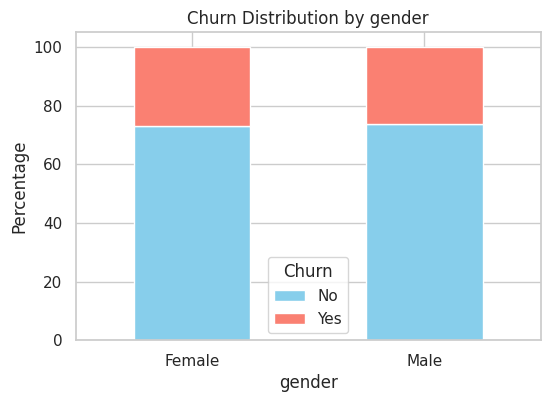

gender: Chi2 = 0.48, p-value = 0.4866
No significant relationship with Churn



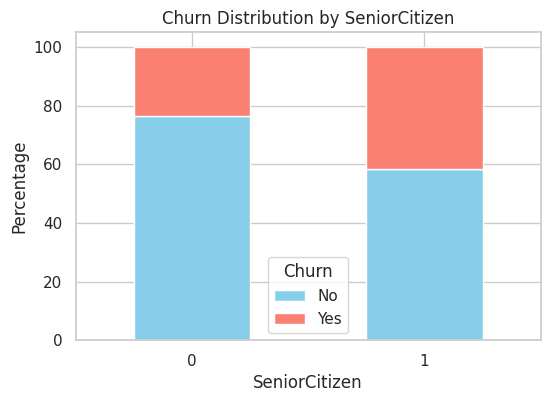

SeniorCitizen: Chi2 = 159.43, p-value = 0.0000
Significant relationship with Churn



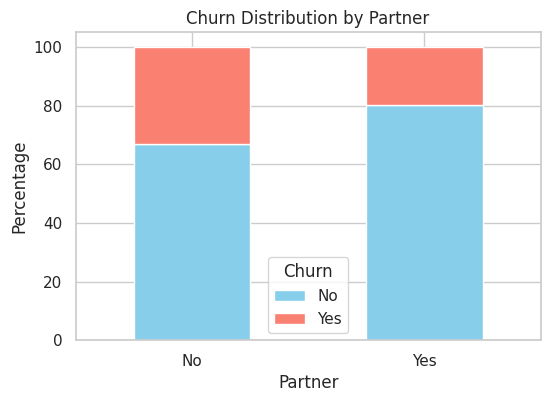

Partner: Chi2 = 158.73, p-value = 0.0000
Significant relationship with Churn



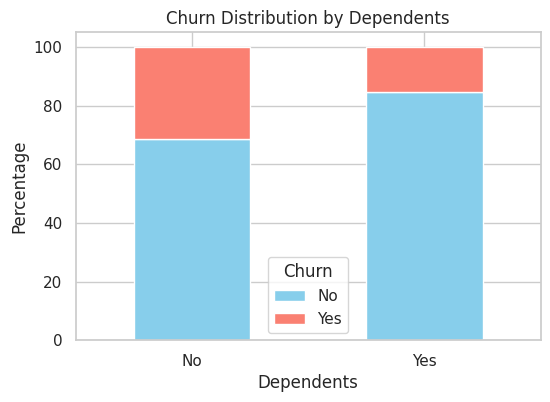

Dependents: Chi2 = 189.13, p-value = 0.0000
Significant relationship with Churn



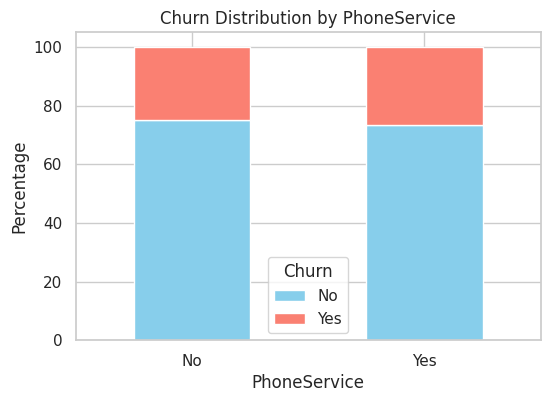

PhoneService: Chi2 = 0.92, p-value = 0.3388
No significant relationship with Churn



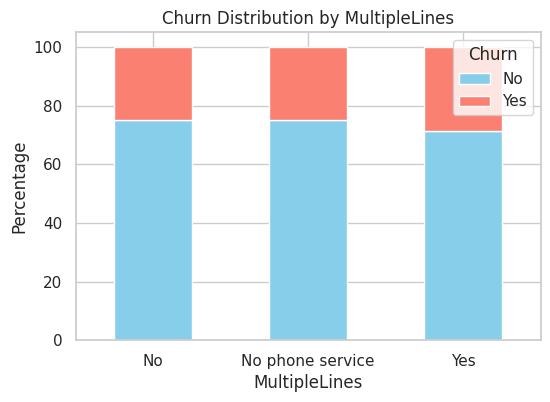

MultipleLines: Chi2 = 11.33, p-value = 0.0035
Significant relationship with Churn



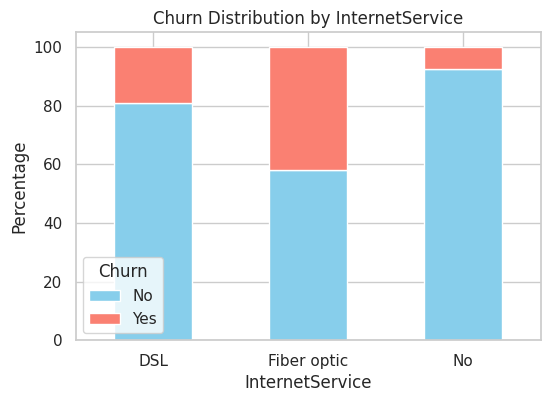

InternetService: Chi2 = 732.31, p-value = 0.0000
Significant relationship with Churn



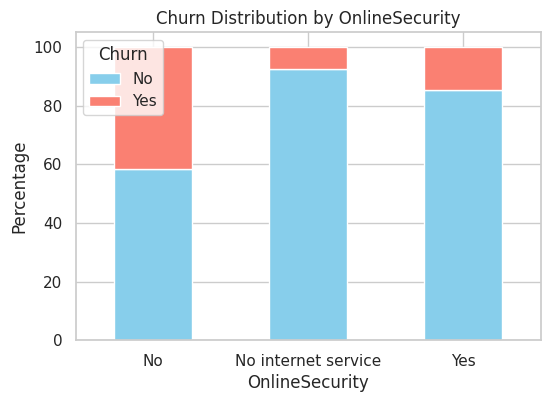

OnlineSecurity: Chi2 = 850.00, p-value = 0.0000
Significant relationship with Churn



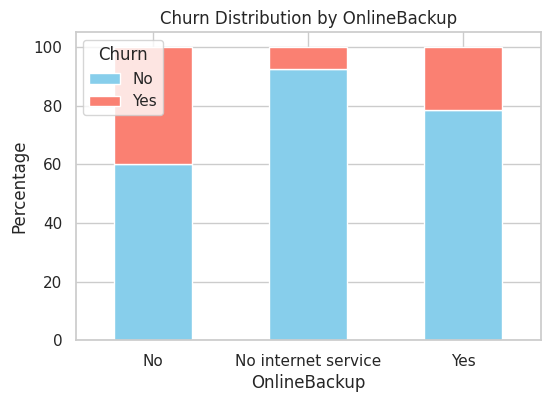

OnlineBackup: Chi2 = 601.81, p-value = 0.0000
Significant relationship with Churn



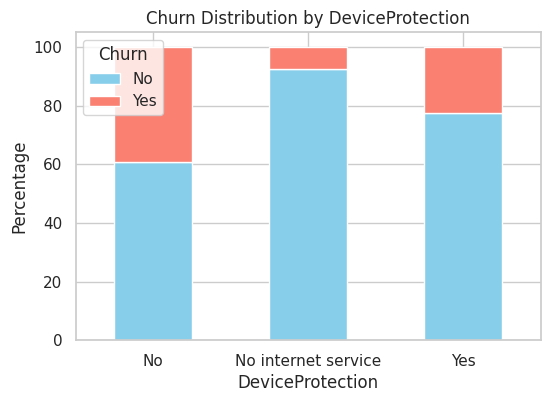

DeviceProtection: Chi2 = 558.42, p-value = 0.0000
Significant relationship with Churn



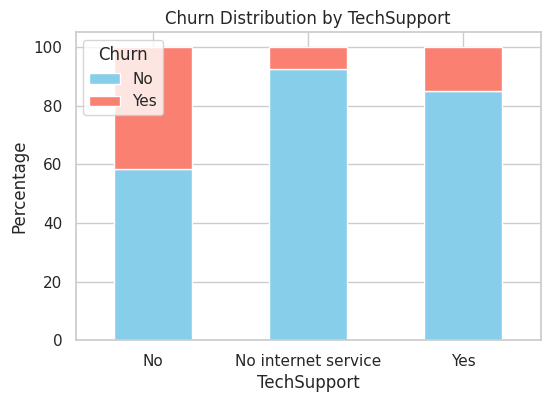

TechSupport: Chi2 = 828.20, p-value = 0.0000
Significant relationship with Churn



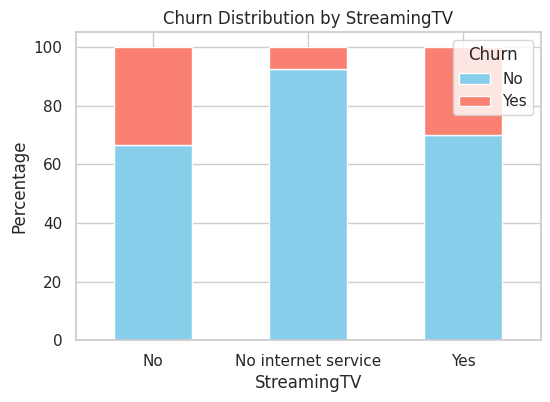

StreamingTV: Chi2 = 374.20, p-value = 0.0000
Significant relationship with Churn



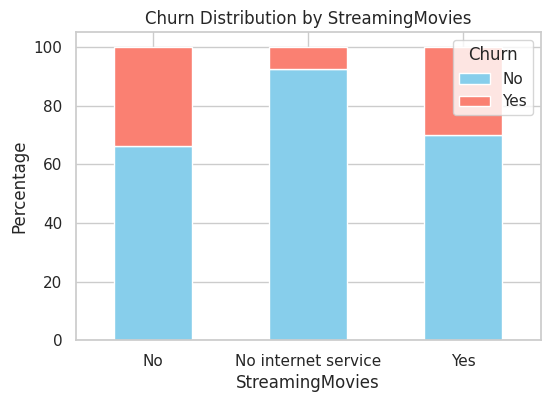

StreamingMovies: Chi2 = 375.66, p-value = 0.0000
Significant relationship with Churn



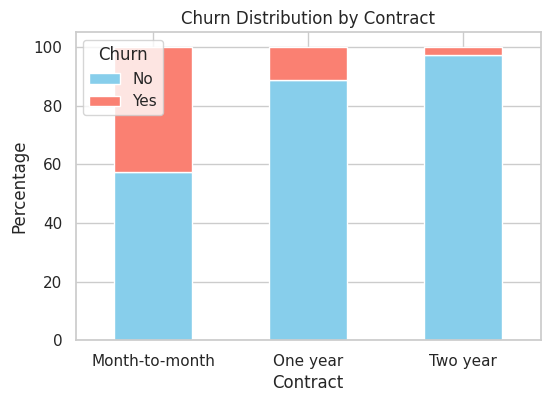

Contract: Chi2 = 1184.60, p-value = 0.0000
Significant relationship with Churn



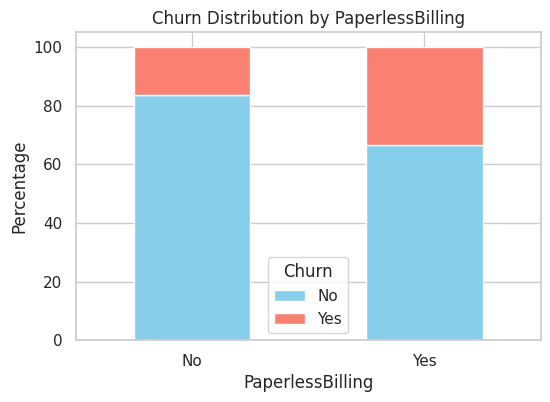

PaperlessBilling: Chi2 = 258.28, p-value = 0.0000
Significant relationship with Churn



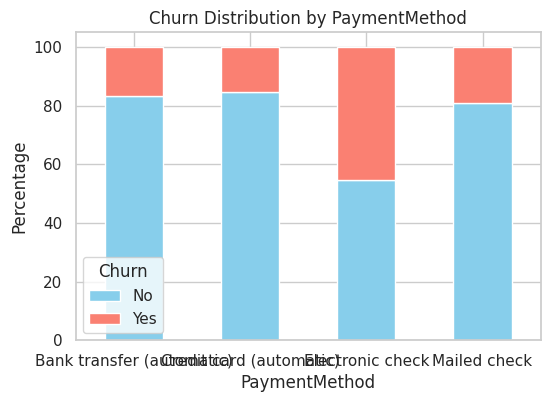

PaymentMethod: Chi2 = 648.14, p-value = 0.0000
Significant relationship with Churn



In [ ]:
#Perform Chi-Square Test on Categorical Features
print("Chi-Square Test Results (Categorical vs Churn):\n")

for col in categorical_features:
    # Create percentage stacked bar chart for churn distribution
    plt.figure(figsize=(6, 4))
    churn_rate = pd.crosstab(telco_base_data[col], telco_base_data['Churn'], normalize='index') * 100
    churn_rate.plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])

    plt.title(f"Churn Distribution by {col}")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.xticks(rotation=0)
    plt.show()

    # Chi-Square Test
    contingency = pd.crosstab(telco_base_data[col], telco_base_data['Churn'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)

    print(f"{col}: Chi2 = {chi2:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Significant relationship with Churn\n")
    else:
        print("No significant relationship with Churn\n")


In [ ]:
# List of numerical columns to analyze
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

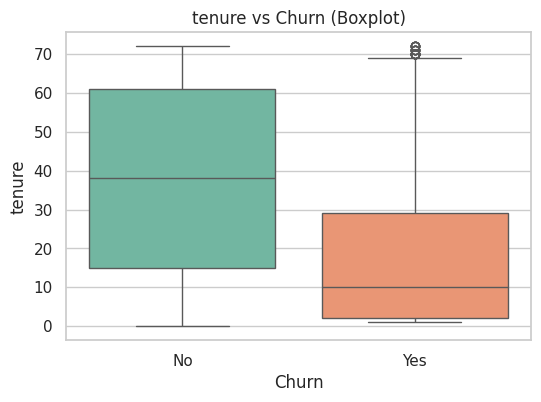

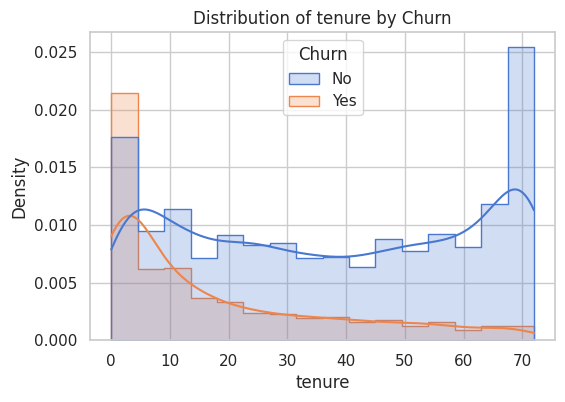

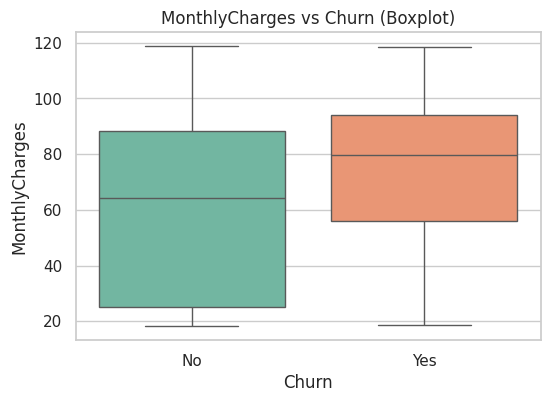

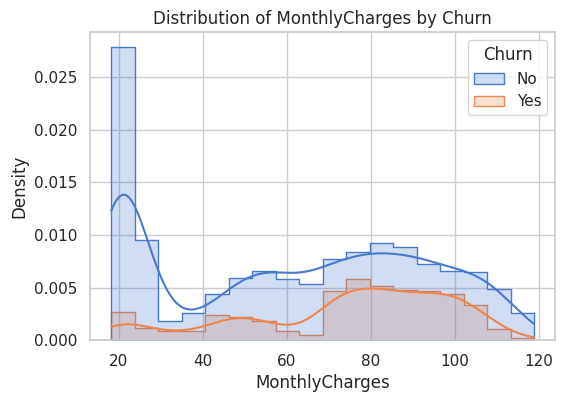

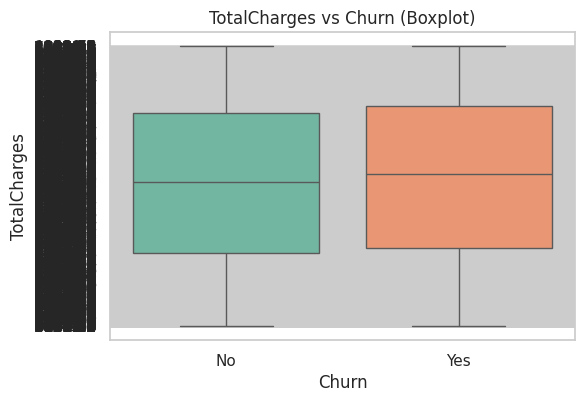

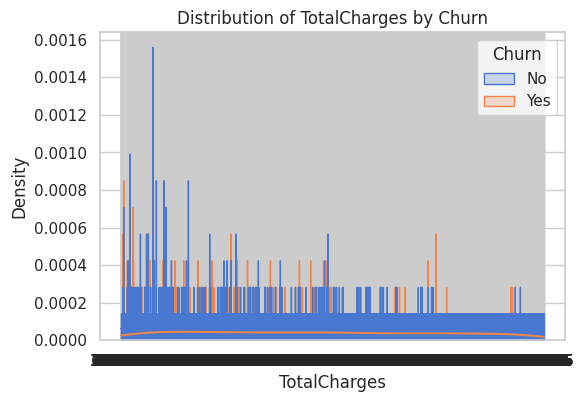

In [ ]:
#Numerical Features Visualization
for col in numerical_features:
    # Boxplot of numerical feature vs churn
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x='Churn',
        y=col,
        data=telco_base_data,
        hue='Churn',
        palette="Set2",
        legend=False
    )
    plt.title(f"{col} vs Churn (Boxplot)")
    plt.show()

    # Distribution plot
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=telco_base_data,
        x=col,
        hue='Churn',
        kde=True,
        element="step",
        stat="density"
    )
    plt.title(f"Distribution of {col} by Churn")
    plt.show()

T-Test Results (Numerical Variables vs Churn):

tenure: t-stat = -34.97, p-value = 0.0000
 Significant difference between Churn groups



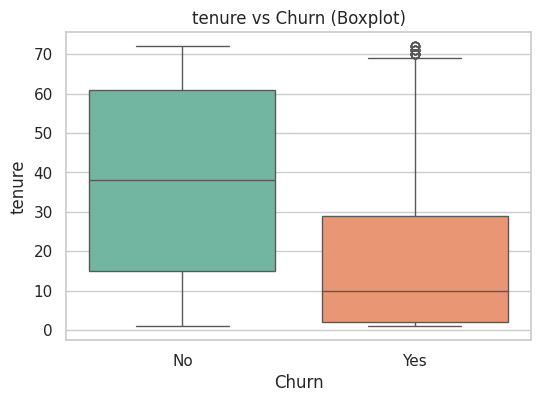

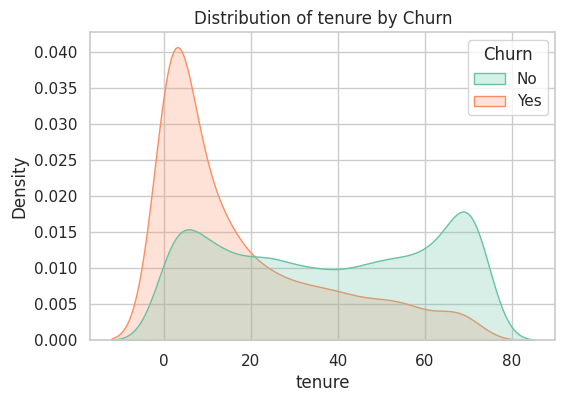

MonthlyCharges: t-stat = 18.34, p-value = 0.0000
 Significant difference between Churn groups



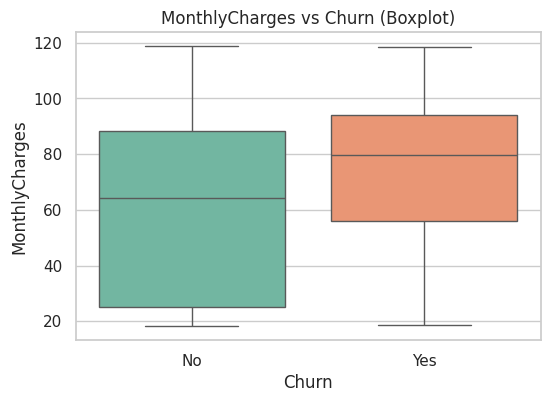

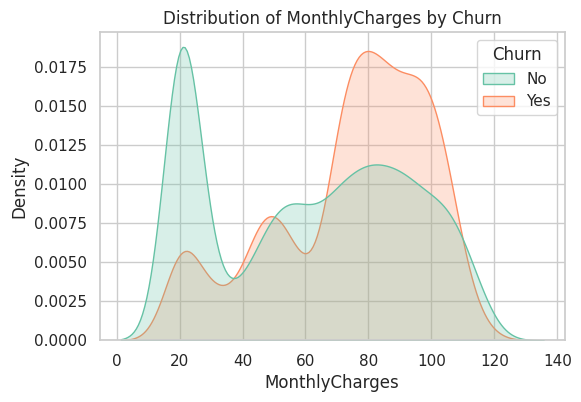

TotalCharges: t-stat = -18.80, p-value = 0.0000
 Significant difference between Churn groups



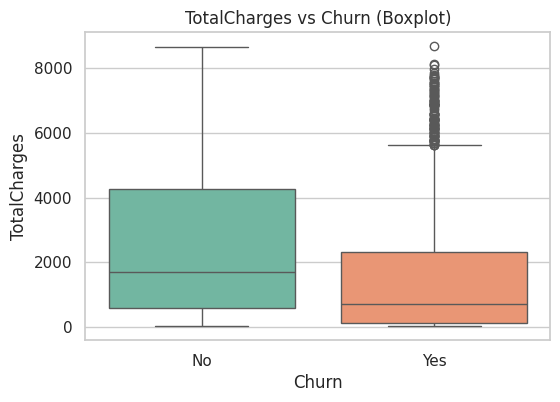

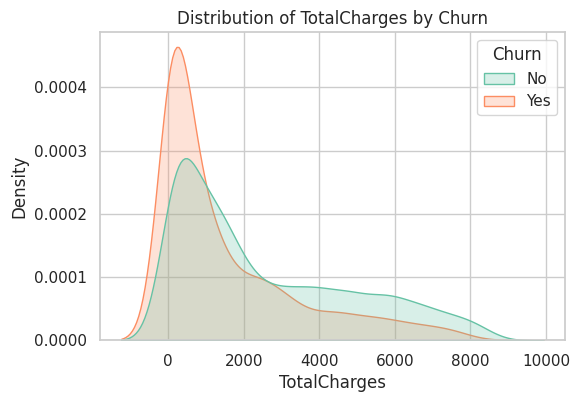

In [ ]:
# Perform T-tests and visualize
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric columns are clean and properly typed
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    telco_base_data[col] = pd.to_numeric(telco_base_data[col], errors='coerce')

# Drop rows with missing numerical values (optional)
telco_base_data.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'], inplace=True)

# Define numerical columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("T-Test Results (Numerical Variables vs Churn):\n")

for col in numerical_features:
    # Separate churned and non-churned groups
    churn_yes = telco_base_data[telco_base_data['Churn'] == 'Yes'][col]
    churn_no = telco_base_data[telco_base_data['Churn'] == 'No'][col]

    # Perform Welch’s t-test (handles unequal variances)
    t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False, nan_policy='omit')

    # Print formatted results
    print(f"{col}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print(" Significant difference between Churn groups\n")
    else:
        print("  No significant difference between Churn groups\n")

    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=telco_base_data,
        x='Churn',
        y=col,
        hue='Churn',
        dodge=False,
        palette='Set2',
        legend=False
    )
    plt.title(f"{col} vs Churn (Boxplot)")
    plt.show()

    # KDE Plot (distribution)
    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=telco_base_data,
        x=col,
        hue='Churn',
        fill=True,
        common_norm=False,
        palette='Set2'
    )
    plt.title(f"Distribution of {col} by Churn")
    plt.show()


## Observations from Bivariate Analysis
**Categorical Features vs Churn**

* Contract Type



    * Customers on Month-to-Month contracts have the highest churn rate.
    *  Customers on One/Two-Year contracts are much less likely to churn.

> Strong significant relationship

*   Internet Service


    *  Customers using Fiber Optic internet churn more compared to DSL or No Internet.
    *  Lack of Online Security, Tech Support, and Device Protection strongly increases churn.

> Significant relationship.

*   Payment Method


    *  Customers using Electronic check show much higher churn compared to credit card, bank transfer, or mailed check
> Significant relationship.

*   Senior Citizen


    *  Senior Citizens have a slightly higher churn rate compared to younger customers.
> Significant relationship.

*  Partner & Dependents


    *  Customers with no partner or dependents are more likely to churn.
> Significant relationship.

*  Gender


    *  Churn is almost equally distributed between male and female.
> No significant relationship.


## Numerical Features vs Churn

*   Tenure


    *  Customers with shorter tenure (newer customers) churn much more.
    *  Long-term customers (loyal base) are less likely to churn.

> Significant difference.

*   Monthly Charges


    *  Customers with higher monthly charges are more likely to churn.
    
> Significant difference.

*  Total Charges


    *  Customers with low total charges (new customers) churn more.
    
> Significant difference.


## Data Preprocessing for Modeling

In [ ]:
telco_encoded = pd.get_dummies(telco_base_data, drop_first=True)

## Train-Test Split

In [ ]:
X = telco_encoded.drop("Churn_Yes", axis=1)  # target encoded as Churn_Yes
y = telco_encoded["Churn_Yes"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Models

In [ ]:
!pip -q install imbalanced-learn xgboost shap lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 11.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from lifelines import KaplanMeierFitter

In [ ]:
#Prepare data (clean, define features)
# telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Cleaning known trouble column
telco = telco_base_data.copy()
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco = telco.dropna(subset=['TotalCharges']).reset_index(drop=True)
# Binary target: Yes->1, No->0
telco['Churn'] = (telco['Churn'] == 'Yes').astype(int)
# Features
drop_cols = ['customerID', 'Churn']
all_cols = telco.columns.tolist()
feature_cols = [c for c in all_cols if c not in drop_cols]
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [c for c in feature_cols if c not in numeric_features]

X = telco[feature_cols]
y = telco['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
len(X_train), len(X_test), y.mean().round(3)

(5625, 1407, np.float64(0.266))

In [ ]:
# ColumnTransformer: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ],
    remainder='drop'
)

In [ ]:
#evaluation function
def evaluate(model_name, y_true, y_pred, y_proba):
    acc  = accuracy_score(y_true, y_pred)
    pre  = precision_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    f1   = f1_score(y_true, y_pred)
    auc  = roc_auc_score(y_true, y_proba)

    print(f"=== {model_name} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {pre:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print(f"ROC-AUC  : {auc:.3f}\n")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    RocCurveDisplay.from_predictions(y_true, y_proba, ax=ax[0])
    ax[0].set_title(f"ROC — {model_name}")
    PrecisionRecallDisplay.from_predictions(y_true, y_proba, ax=ax[1])
    ax[1].set_title(f"Precision-Recall — {model_name}")
    plt.show()

## Logistic Regression
Logistic Regression is a simple, interpretable model for binary classification.
It estimates the probability that a customer will churn (1 = churn, 0 = not churn).


In [ ]:
log_model = LogisticRegression(class_weight='balanced', random_state=42)
# Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)
# Apply SMOTE to the processed training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)
# Train on resampled (balanced) training data
log_model.fit(X_train_res, y_train_res)
# Apply preprocessing to the test data
X_test_processed = preprocessor.transform(X_test)
# Predict on test set
y_pred_log = log_model.predict(X_test_processed)
y_prob_log = log_model.predict_proba(X_test_processed)[:,1]

In [ ]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Logistic Regression Evaluation
Accuracy: 0.7306325515280739
Precision: 0.4957410562180579
Recall: 0.7780748663101604
F1-score: 0.6056191467221644
ROC-AUC: 0.8336486843263223


Accuracy measures overall correctness.

Precision tells how many predicted churners are actual churners.

Recall tells how many real churners were caught.

F1-score balances both precision and recall.

ROC-AUC measures model’s ability to distinguish churn vs non-churn.

## Decision Tree
A tree-like model that splits data based on feature values.

Easy to interpret and can capture non-linear relationships.

In [ ]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# Train the model on the resampled and preprocessed training data
tree_model.fit(X_train_res, y_train_res)
# Apply preprocessing to the test data before prediction
X_test_processed = preprocessor.transform(X_test)
# Predict on the preprocessed test set
y_pred_tree = tree_model.predict(X_test_processed)
y_prob_tree = tree_model.predict_proba(X_test_processed)[:,1]

In [ ]:
print("Decision Tree Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree))

Decision Tree Evaluation
Accuracy: 0.7135749822316987
Precision: 0.4671201814058957
Recall: 0.5508021390374331
F1-score: 0.505521472392638
ROC-AUC: 0.661654699722008


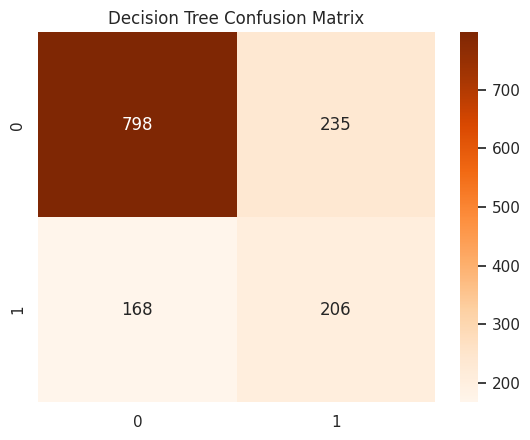

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.show()

## XGBoost Classifier
Gradient Boosting algorithm. Combines many weak learners (trees) to improve accuracy.

In [ ]:
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(scale_pos_weight=scale_weight, random_state=42, eval_metric='logloss')
# Train the model on the resampled and preprocessed training data
xgb_model.fit(X_train_res, y_train_res)
# Apply preprocessing to the test data before prediction
X_test_processed = preprocessor.transform(X_test)
# Predict on the preprocessed test set
y_pred_xgb = xgb_model.predict(X_test_processed)
y_prob_xgb = xgb_model.predict_proba(X_test_processed)[:,1]

In [ ]:
print("XGBoost Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Evaluation
Accuracy: 0.749822316986496
Precision: 0.5207547169811321
Recall: 0.7379679144385026
F1-score: 0.6106194690265486
ROC-AUC: 0.8176020210072941


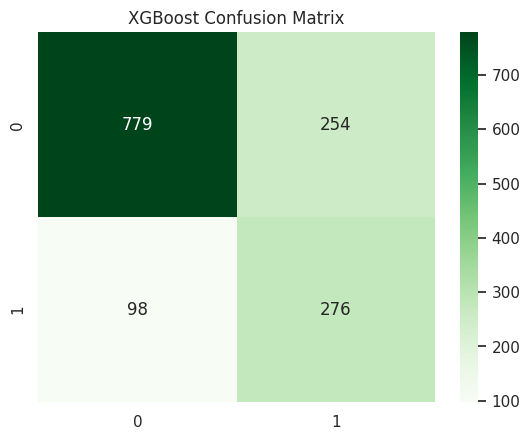

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()

## SHAP
SHAP explains predictions of complex models such as XGBoost by showing how each feature affects the output.


/tmp/ipython-input-2716974969.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)


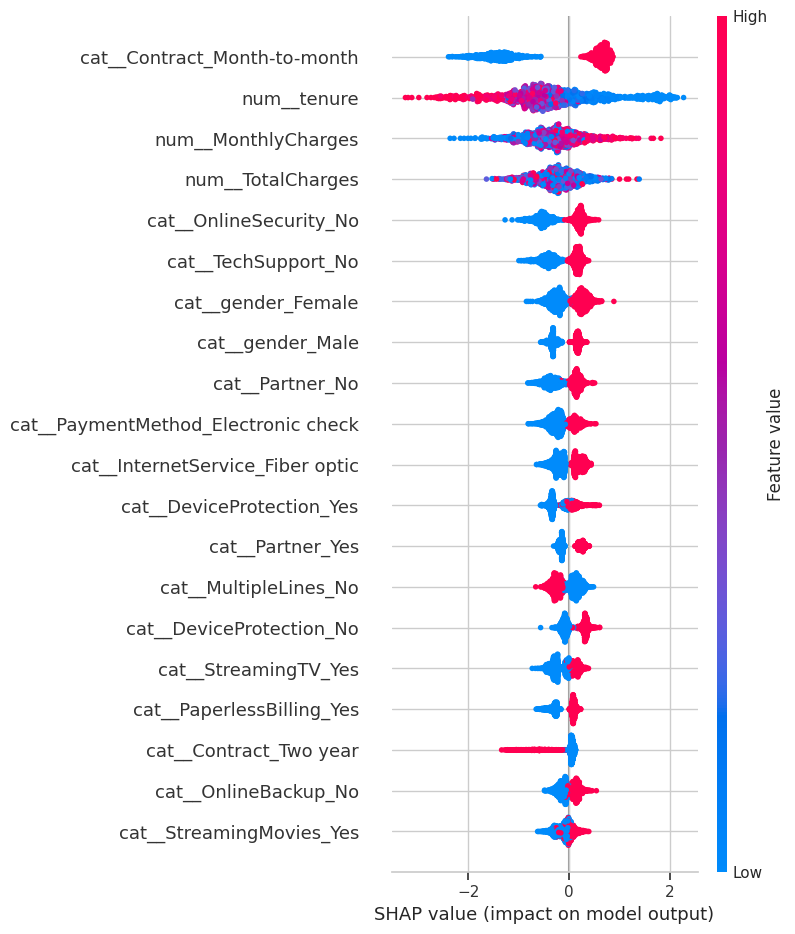

In [ ]:
# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_processed)
# SHAP summary plot
# Use feature names from the preprocessor's one-hot encoded output
feature_names = preprocessor.get_feature_names_out()
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)

Features at the top are most influential for churn prediction.

Red points increase churn probability, blue points decrease it.

## ANN (Neural Network) Model
ANN can capture complex patterns in data.

In [ ]:
# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(32, input_dim=X_train_res.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = ann_model.fit(
    X_train_res, y_train_res,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4323 - val_accuracy: 0.7591 - val_loss: 0.5029
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7944 - loss: 0.4330 - val_accuracy: 0.7615 - val_loss: 0.4926
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4214 - val_accuracy: 0.7621 - val_loss: 0.4998
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.4248 - val_accuracy: 0.7591 - val_loss: 0.4924
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4054 - val_accuracy: 0.7185 - val_loss: 0.5532
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.4229 - val_accuracy: 0.7694 - val_loss: 0.4580
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8076 - loss: 0.4210 - val_accuracy: 0.7494 - val_loss: 0.5105
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8101 - loss: 0.4142 - val_accu

In [ ]:
# Apply preprocessing to the test data before prediction
X_test_processed = preprocessor.transform(X_test)
# Predictions
y_pred_ann_prob = ann_model.predict(X_test_processed)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int)
# Evaluation
print("ANN Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1-score:", f1_score(y_test, y_pred_ann))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_ann_prob))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
ANN Performance
Accuracy: 0.775408670931059
Precision: 0.5644444444444444
Recall: 0.679144385026738
F1-score: 0.616504854368932
ROC-AUC: 0.8239293165123129


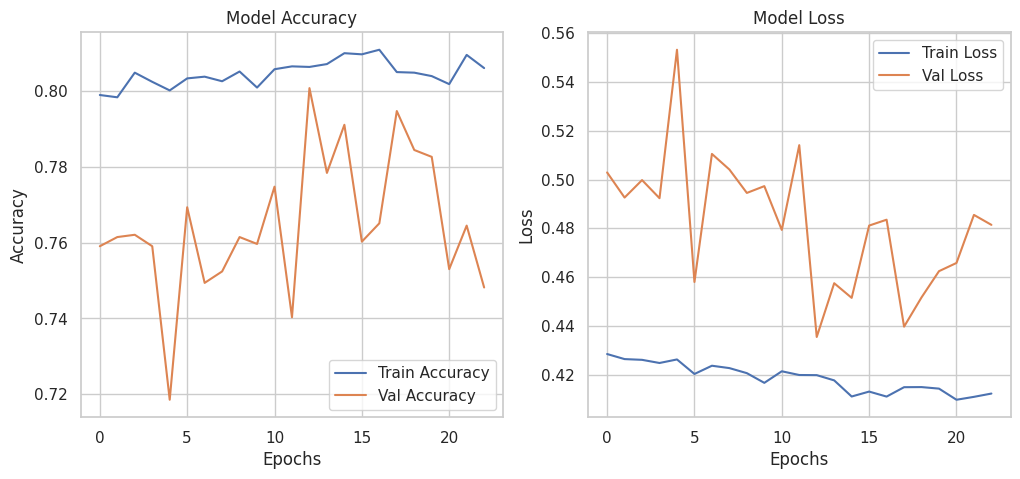

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

ANN captures complex, non-linear relationships.

Dropout layers prevent overfitting.

Early stopping ensures the model doesn’t train beyond optimal point.

In [ ]:
# Create a summary dictionary
model_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost', 'ANN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_ann)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_ann)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_ann)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_ann)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_tree),
        roc_auc_score(y_test, y_prob_xgb),
        roc_auc_score(y_test, y_pred_ann_prob)
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.730633,0.495741,0.778075,0.605619,0.833649
1,Decision Tree,0.713575,0.467120,0.550802,0.505521,0.661655
2,XGBoost,0.749822,0.520755,0.737968,0.610619,0.817602
3,ANN,0.775409,0.564444,0.679144,0.616505,0.823929


<Figure size 1100x500 with 0 Axes>

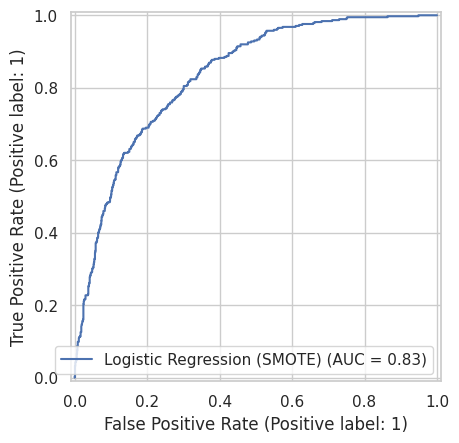

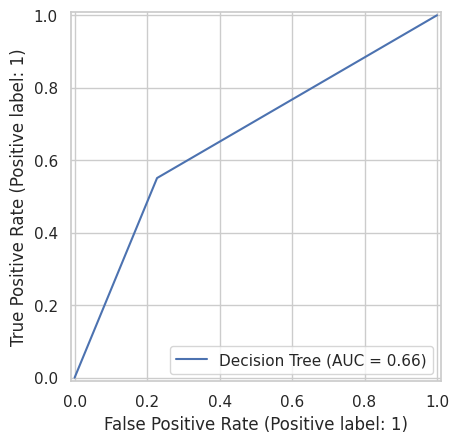

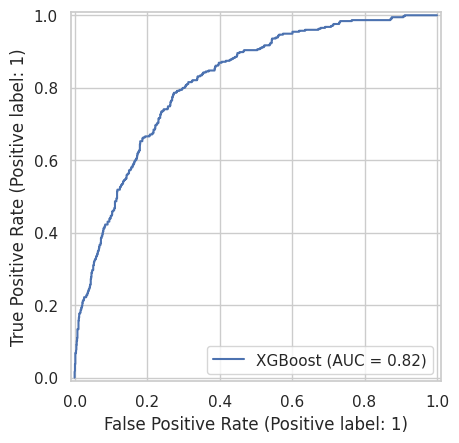

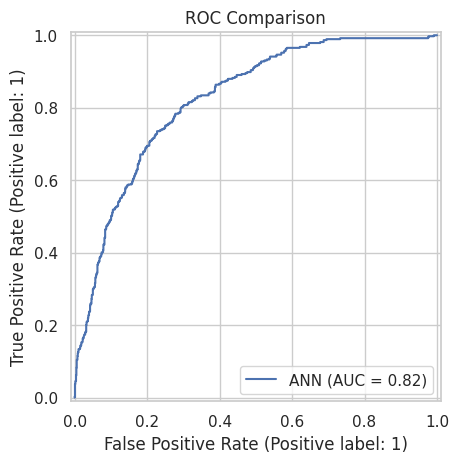

In [ ]:
plt.figure(figsize=(11,5))
RocCurveDisplay.from_predictions(y_test, y_prob_log,  name="Logistic Regression (SMOTE)")
RocCurveDisplay.from_predictions(y_test, y_prob_tree, name="Decision Tree")
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost")
RocCurveDisplay.from_predictions(y_test, y_pred_ann_prob,  name="ANN")
plt.title("ROC Comparison")
plt.show()

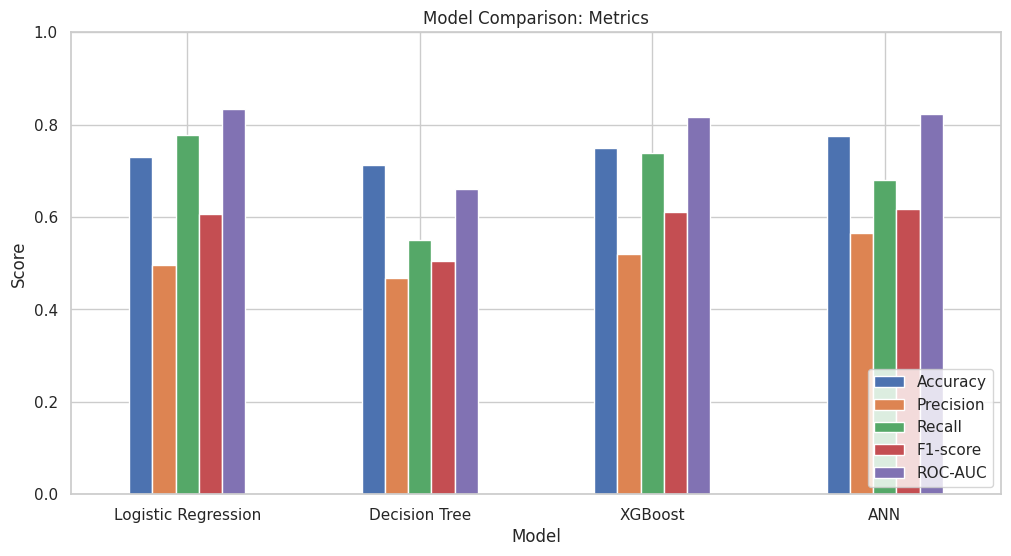

In [ ]:
metrics_plot = metrics_df.set_index('Model')
metrics_plot.plot(kind='bar', figsize=(12,6))
plt.title("Model Comparison: Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

### Business Recommendations Based on Model Insights

Using model predictions and SHAP feature importance, we can provide actionable steps to reduce churn.

**Month-to-Month Contracts:**

*   Customers on month-to-month plans are more likely to churn.
*   Offering discounts can retain them.


**Long-Term Contracts:**


*   Encourage 1-year or more contracts.
*   This reduces churn probability.

**High Monthly Charges & Short Tenure:**

Customers paying high monthly fees but with short

*   Customers who are paying high monthly fees but with short tenure are at risk.
*   Introducing welcome offers or or free trials will help.


# Ensemble Learning
Ensemble learning combines predictions from multiple models to produce a better, more robust prediction.

**Common approaches:**

Voting Classifier: Combines several models and predicts the class that gets the most votes (hard) or highest probability (soft).

Stacking Classifier: Uses multiple base models to learn from their predictions.


**Voting Classifier (Soft Voting)**

In [ ]:
from sklearn.ensemble import VotingClassifier
log_model = LogisticRegression(class_weight='balanced', random_state=42)
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]), random_state=42, eval_metric='logloss')
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_model),
        ('dt', tree_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)


In [ ]:
# Apply preprocessing to the training data
X_train_processed = preprocessor.transform(X_train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)
voting_clf.fit(X_train_res, y_train_res)
# Apply preprocessing to the test data
X_test_processed = preprocessor.transform(X_test)
# Predict
y_pred_voting = voting_clf.predict(X_test_processed)
y_prob_voting = voting_clf.predict_proba(X_test_processed)[:,1]

In [ ]:
print("Voting Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))
print("Recall:", recall_score(y_test, y_pred_voting))
print("F1-score:", f1_score(y_test, y_pred_voting))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_voting))

Voting Classifier Evaluation
Accuracy: 0.7469793887704336
Precision: 0.5188284518828452
Recall: 0.6631016042780749
F1-score: 0.5821596244131455
ROC-AUC: 0.813236717726781


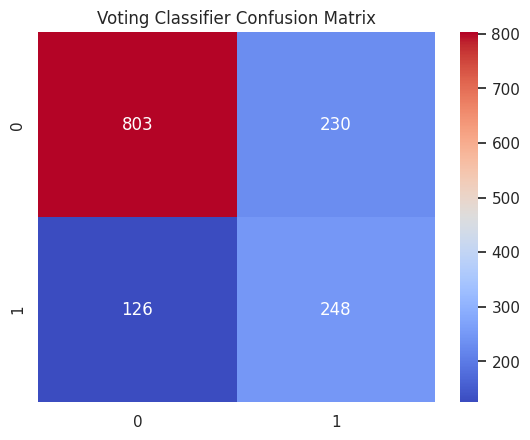

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt='d', cmap='coolwarm')
plt.title("Voting Classifier Confusion Matrix")
plt.show()

**Stacking Classifier**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
# Define base models
base_models = [
    ('lr', LogisticRegression(class_weight='balanced', random_state=42)),
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]), random_state=42, eval_metric='logloss'))
]
#Final model
meta_model = LogisticRegression(class_weight='balanced', random_state=42)
# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [ ]:
# Train
stacking_clf.fit(X_train_res, y_train_res)
# Apply preprocessing to the test data
X_test_processed = preprocessor.transform(X_test)
# Predict
y_pred_stack = stacking_clf.predict(X_test_processed)
y_prob_stack = stacking_clf.predict_proba(X_test_processed)[:,1]

In [ ]:
print("Stacking Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Precision:", precision_score(y_test, y_pred_stack))
print("Recall:", recall_score(y_test, y_pred_stack))
print("F1-score:", f1_score(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_stack))

Stacking Classifier Evaluation
Accuracy: 0.7661691542288557
Precision: 0.5467775467775468
Recall: 0.7032085561497327
F1-score: 0.6152046783625731
ROC-AUC: 0.8265642876001056


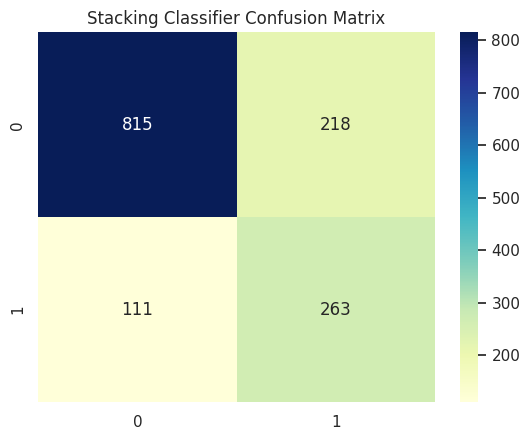

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Stacking Classifier Confusion Matrix")
plt.show()

**Compairing Ensemble Models with Previous Models**

In [ ]:
# Add ensemble results to metrics dataframe
ensemble_metrics = pd.DataFrame({
    'Model': ['Voting Classifier', 'Stacking Classifier'],
    'Accuracy': [accuracy_score(y_test, y_pred_voting), accuracy_score(y_test, y_pred_stack)],
    'Precision': [precision_score(y_test, y_pred_voting), precision_score(y_test, y_pred_stack)],
    'Recall': [recall_score(y_test, y_pred_voting), recall_score(y_test, y_pred_stack)],
    'F1-score': [f1_score(y_test, y_pred_voting), f1_score(y_test, y_pred_stack)],
    'ROC-AUC': [roc_auc_score(y_test, y_prob_voting), roc_auc_score(y_test, y_prob_stack)]
})

# Combine with previous metrics
final_metrics_df = pd.concat([metrics_df, ensemble_metrics], ignore_index=True)
final_metrics_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.730633,0.495741,0.778075,0.605619,0.833649
1,Decision Tree,0.713575,0.467120,0.550802,0.505521,0.661655
2,XGBoost,0.749822,0.520755,0.737968,0.610619,0.817602
3,ANN,0.775409,0.564444,0.679144,0.616505,0.823929
4,Voting Classifier,0.746979,0.518828,0.663102,0.582160,0.813237
5,Stacking Classifier,0.766169,0.546778,0.703209,0.615205,0.826564


<Figure size 1200x600 with 0 Axes>

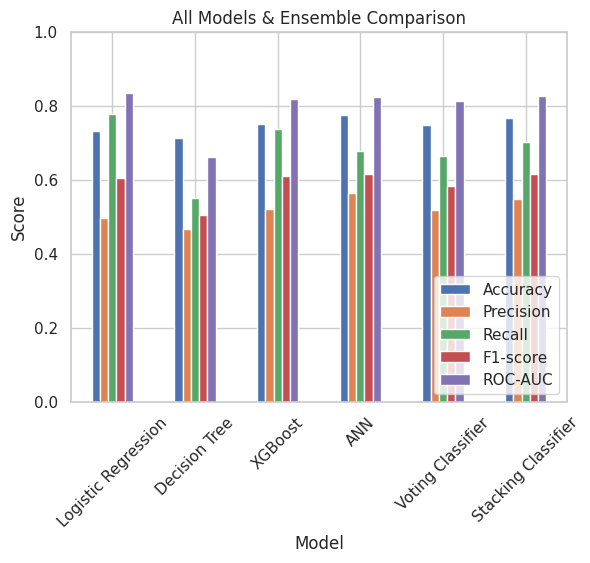

In [ ]:
plt.figure(figsize=(12,6))
final_metrics_df.set_index('Model').plot(kind='bar', ylim=(0,1))
plt.title("All Models & Ensemble Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


**Observations:**


*   Stacking often performed better than both Voting and individual models, achieving the highest F1-score and ROC-AUC.

*   This shows that the meta-model can learn patterns from base models that individual models might miss, making it highly suitable for predicting churn.